In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from tqdm import tqdm
from sklearn.cluster import KMeans

In [3]:
N = 50

def minute(h):
    if h < 8 or h > 18:
        return "09"
    else:
        return "03"
    
def format(num):
    if num <10:
        return f"0{num}"
    else:
        return f"{num}"


days = [np.random.randint(1, 31) for i in range(N)]
months = [np.random.randint(1, 12) for i in range(N)]

dates = [f"{format(month)}/{format(day)}" for day, month in zip(days, months)]
hours = [np.random.randint(0, 24) for i in range(N)]


#times = [f"{format(hour)}-{minute(hour)}" for hour in hours]

times = ["12-03", "23-09"]*(N//2)

URLs = [f"http://data.skaping.com/serre-chevalier/col-du-lautaret/2022/{date}/small/{hour}.jpg" for date,hour in zip(dates, times)]

In [5]:
ims = []
for u in tqdm(URLs):
    req = requests.get(u, stream=True)
    if req.status_code == 200:
        im = Image.open(req.raw)
        ims.append(np.array(im))

100%|██████████| 50/50 [01:10<00:00,  1.41s/it]


In [7]:
ims = [np.array(im) for im in ims]

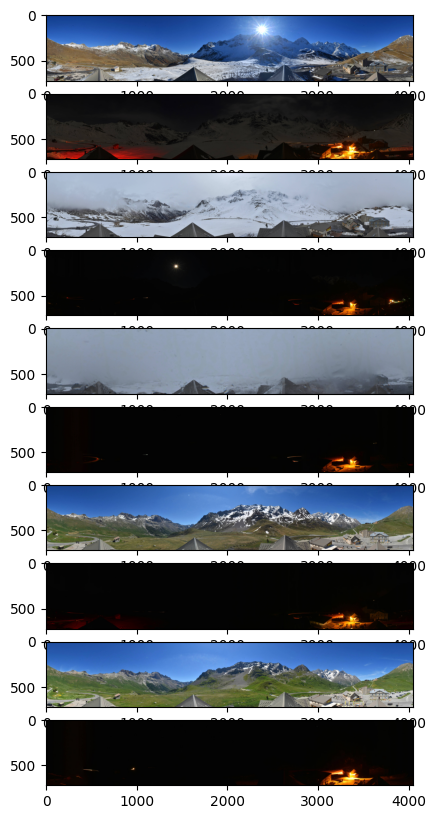

In [12]:
fig, ax = plt.subplots(10)
for i in range(len(ims)):
    ax[i].imshow(ims[i])
fig.set_size_inches(10, 10)

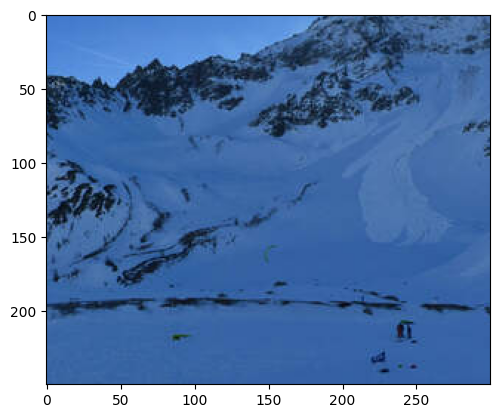

In [117]:
plt.imshow(ims[0][150:400,1200:1500,:])

In [119]:
def cloch(im):
    return im[150:400,1200:1500,:]

In [120]:
width = cloch(ims[0]).shape[0]
height = cloch(ims[0]).shape[1]


def sample(N, im):
    samples = []
    for i in range(N):
        w = np.random.randint(width)
        h = np.random.randint(height)
        #for j in range(3):
        #    samples.append(im[w, h, j])
        samples.append(np.mean(im[w, h]))
    return(samples)

N = 200
multisample = [sample(N, cloch(i)) for i in ims]

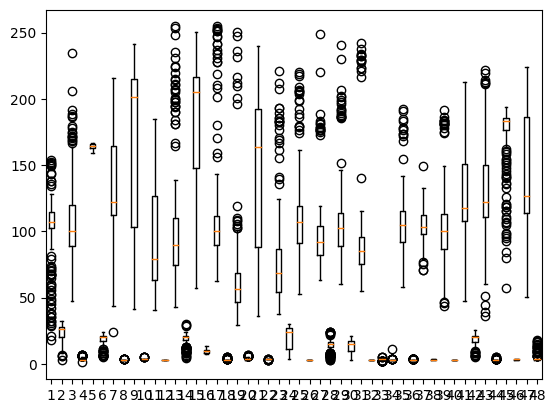

In [121]:
plt.boxplot(multisample)
plt.show()

In [122]:
n_clusters = 3
clustering = KMeans(n_clusters = n_clusters).fit(multisample)
labs = clustering.labels_
clusts = [[0] for i in range(n_clusters)]
for i in range(len(labs)):
    clusts[labs[i]].append(i)

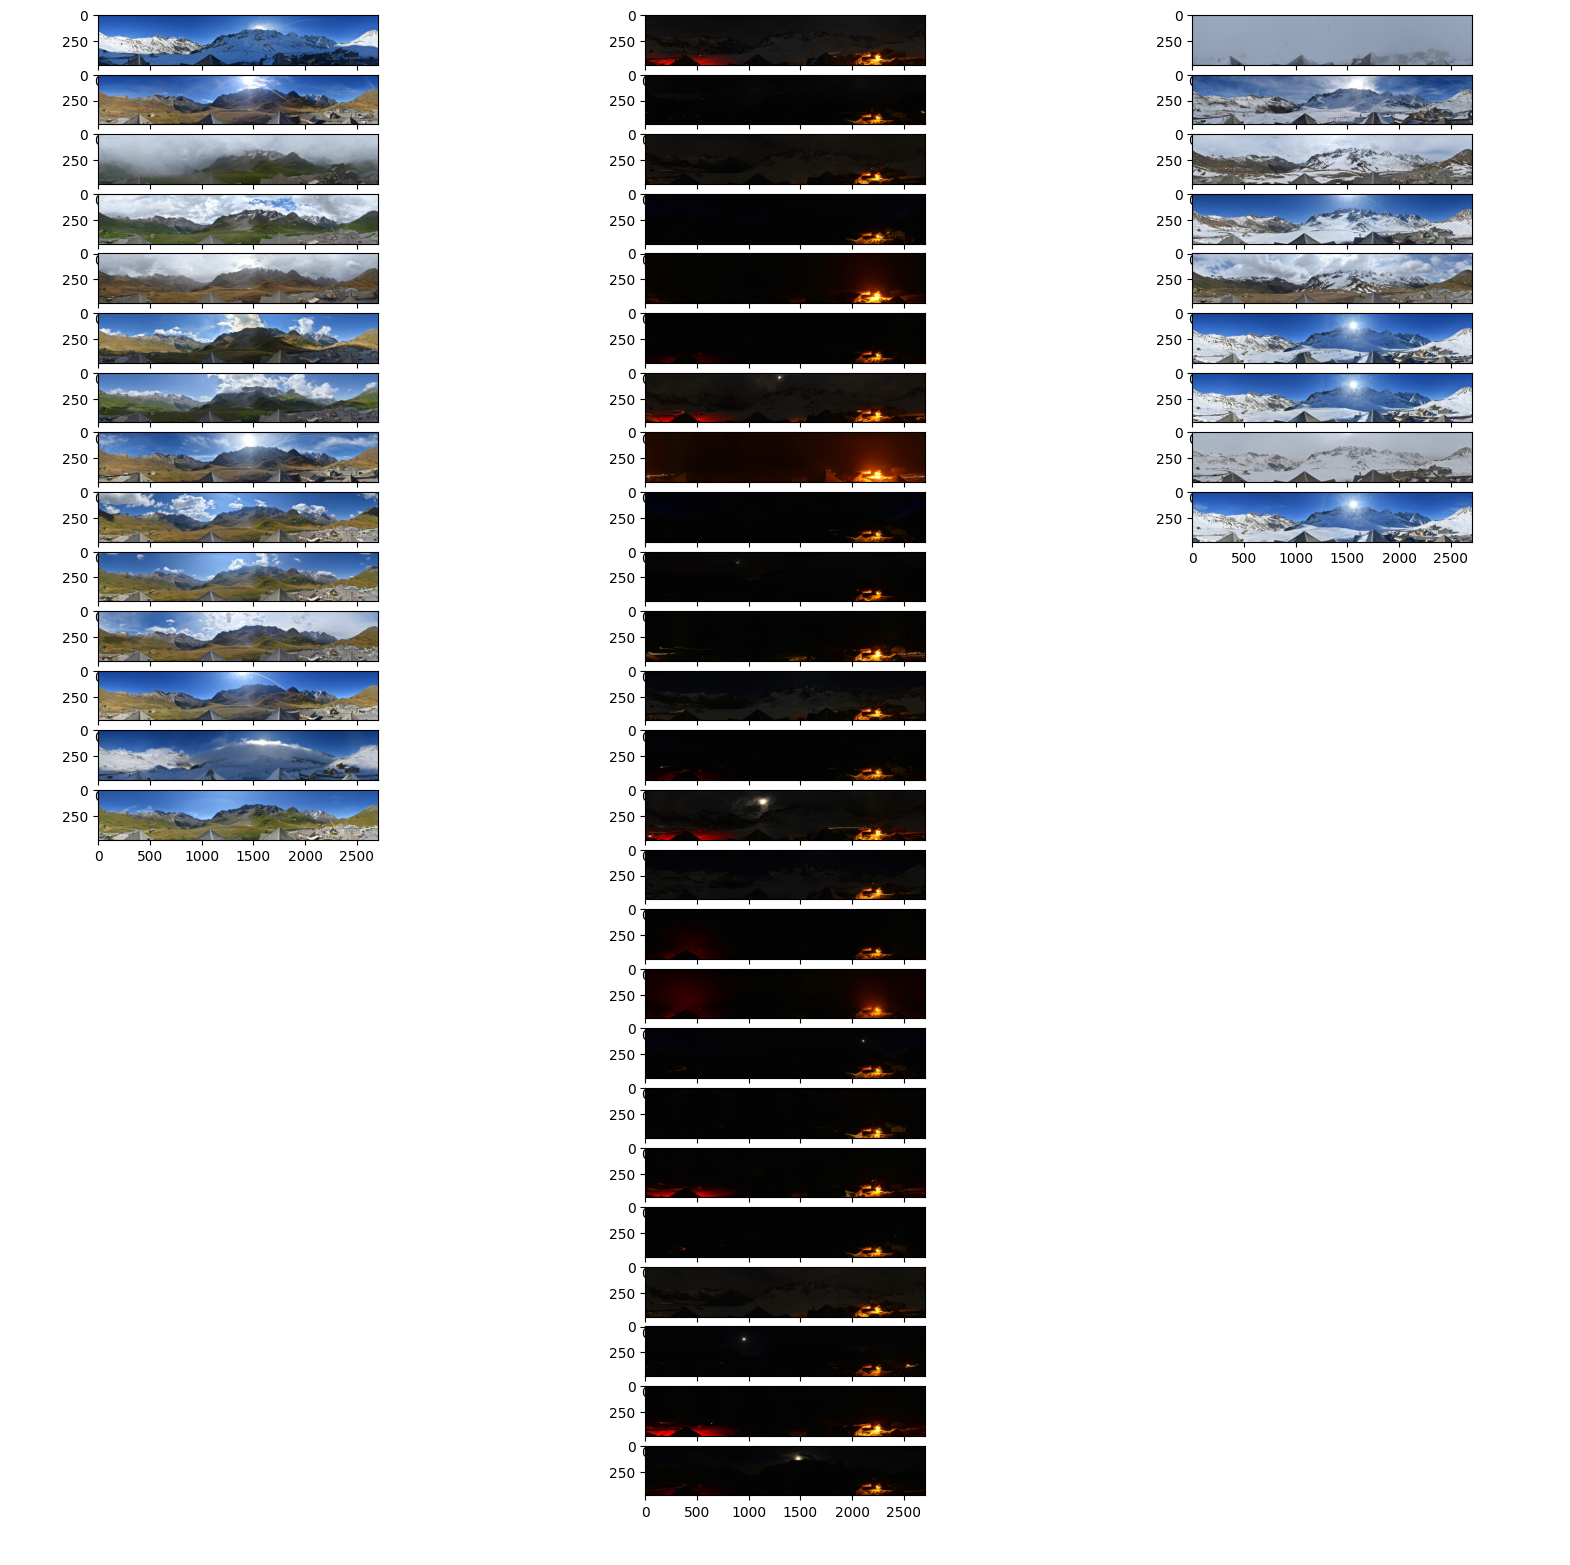

In [123]:
#plot each of the clusters in a different column
fig, axes = plt.subplots(max([len(c) for c in clusts]), n_clusters)
available = [0, 0, 0]

for ax in axes.flat:
    ax.set_axis_off()

for i in range(len(ims)):
    col = labs[i]
    axes[available[col] , col].set_axis_on()
    axes[available[col] , col].imshow(ims[i])
    available[col] += 1


fig.set_size_inches(20, 20)